In [1]:
#install dependencies:
!pip install -q \
    transformers \
    datasets \
    evaluate \
    scikit-learn \
    matplotlib \
    seaborn \
    pandas \
    numpy \
    accelerate \
    tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# BLOCK 1: Load & Explore the Dataset

In [2]:
from datasets import load_dataset

# Load the LIAR dataset from HuggingFace
dataset = load_dataset("liar")

# Check available splits
print(dataset)

# View a few examples
print(dataset["train"][0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

liar.py:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

The repository for liar contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/liar.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/10269 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1283 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1284 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 10269
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1283
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1284
    })
})
{'id': '2635.json', 'label': 0, 'statement': 'Says the Annies List political group supports third-trimester abortions on deman

# BLOCK 2: Preprocess — Label Mapping & Tokenization

## Step 1: Confirm Label Mapping

In [3]:
id2label = {
    0: "pants-fire",
    1: "false",
    2: "barely-true",
    3: "half-true",
    4: "mostly-true",
    5: "true"
}
label2id = {v: k for k, v in id2label.items()}

## Step 2: Tokenize the “statement” column

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(example):
    return tokenizer(
        example["statement"],
        padding="max_length",  # or "longest" during testing
        truncation=True,
        max_length=128
    )

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Step 3: Apply Tokenizer Across Dataset

In [5]:
# Apply to all splits
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/10269 [00:00<?, ? examples/s]

Map:   0%|          | 0/1283 [00:00<?, ? examples/s]

Map:   0%|          | 0/1284 [00:00<?, ? examples/s]

This adds:
	•	input_ids
	•	attention_mask
	•	Keeps label as is

# BLOCK 3: Prepare the Dataset for HuggingFace Trainer

## Step 1: Keep Only Required Columns

The model only needs:
	•	input_ids
	•	attention_mask
	•	label, So we’ll remove all other columns:

In [6]:
tokenized_datasets = tokenized_datasets.remove_columns(
    [col for col in tokenized_datasets["train"].column_names if col not in ["input_ids", "attention_mask", "label"]]
)

## Step 2: Set Dataset Format for PyTorch

In [7]:
tokenized_datasets.set_format("torch")

## Step 3: Split into Train/Validation/Test

In [8]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["validation"]
test_dataset = tokenized_datasets["test"]

This clean split ensures:
	•	train_dataset → for model learning
	•	eval_dataset → for validation during training
	•	test_dataset → for final evaluation after training

# BLOCK 4: Load DistilBERT Model for 6-Class Classification

## Step 1: Define Label Mappings

In [9]:
id2label = {
    0: "pants-fire",
    1: "false",
    2: "barely-true",
    3: "half-true",
    4: "mostly-true",
    5: "true"
}
label2id = {v: k for k, v in id2label.items()}

## Step 2: Load the Model

In [10]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=6,
    id2label=id2label,
    label2id=label2id
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# BLOCK 5: Define TrainingArguments & Trainer

## Step 1: Define TrainingArguments

In [11]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",  # Updated parameter name
    save_strategy="epoch",
    logging_strategy="steps",
    logging_steps=100,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

## Step 2: Define a Metric Function

In [12]:
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

## Step 3: Create the Trainer

In [13]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-13-24b704fc3dab>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## Step: BLOCK 6 — Launch Training

In [14]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shafeequdeen (shafeequdeen-hindustan-institute-of-technology-and-science) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,1.693900,1.707230,0.243769
2,1.564100,1.692806,0.280374
3,1.156600,1.949700,0.274143


TrainOutput(global_step=3852, training_loss=1.487397597957623, metrics={'train_runtime': 185.1511, 'train_samples_per_second': 166.388, 'train_steps_per_second': 20.805, 'total_flos': 1020303565069824.0, 'train_loss': 1.487397597957623, 'epoch': 3.0})

This will:
	•	Start fine-tuning DistilBERT on your LIAR dataset
	•	Show training + validation loss
	•	Save model checkpoints

## Step 2: Save the Fine-Tuned Model & Tokenizer

In [15]:
model_save_path = "../models/fine_tuned_distilbert_liar"

# Save model & tokenizer
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

import shutil

# Zip the folder
shutil.make_archive(model_save_path, 'zip', model_save_path)

'/models/fine_tuned_distilbert_liar.zip'

In [16]:
from google.colab import files

# Download
files.download(f"{model_save_path}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# BLOCK 7: Evaluate Fine-Tuned Model on Test Set

## Step 1: Evaluate Using trainer.evaluate()

In [17]:
results = trainer.evaluate(eval_dataset=test_dataset)
print("📊 Test Set Evaluation Metrics:", results)

📊 Test Set Evaluation Metrics: {'eval_loss': 1.66912043094635, 'eval_accuracy': 0.2727981293842556, 'eval_runtime': 1.5168, 'eval_samples_per_second': 845.867, 'eval_steps_per_second': 106.145, 'epoch': 3.0}


This gives you:
	•	eval_loss
	•	eval_accuracy
	•	(More, if additional metrics are added like F1)

## Step 2: Classification Report & Confusion Matrix

              precision    recall  f1-score   support

  pants-fire       0.29      0.36      0.32       250
       false       0.26      0.42      0.32       267
 barely-true       0.26      0.27      0.27       249
   half-true       0.32      0.18      0.23       211
 mostly-true       0.25      0.16      0.19       214
        true       0.31      0.12      0.17        92

    accuracy                           0.27      1283
   macro avg       0.28      0.25      0.25      1283
weighted avg       0.28      0.27      0.26      1283



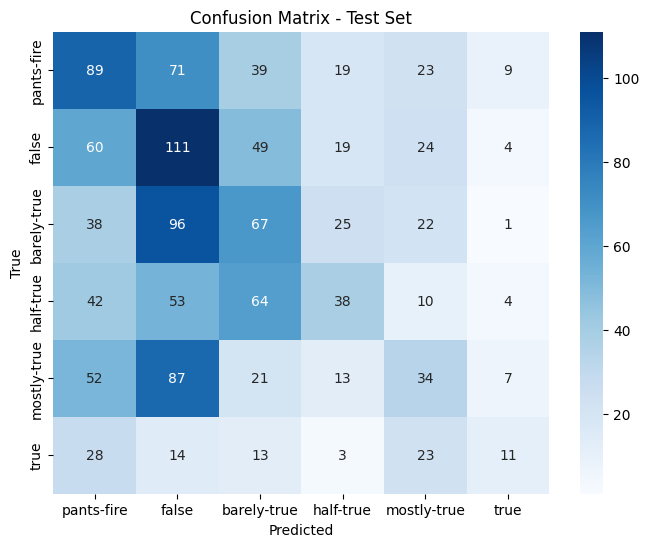

In [18]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=list(id2label.values())))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=id2label.values(), yticklabels=id2label.values(), cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Set")
plt.show()